## Import Libraries

In [ ]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]
import warnings
warnings.filterwarnings(action="ignore")

## Load Dataset

In [ ]:
df_store = pd.read_excel('US Superstore data.xls')
df_store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df_store.shape

(9994, 21)

In [ ]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
#Checking number of unique rows in each feature

nu = df_store.nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df_store.shape[1]):
    if nu.values[i]<=45:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 13 numerical & 8 categorical features.


## Cleaning dataset

Checking duplicate

In [ ]:
df_store.duplicated().sum()

0

Checking missing values

In [ ]:
df_store.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
#Dropping  ID coloumn column and assigning to df_store
df_store.drop(['Row ID','Order ID','Customer ID','Product ID'], axis=1, inplace=True)
df_store.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df_store['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

The dataset is clearly from US only so the analysis for this coloumn is not required

In [ ]:
#dropping Country column
df_store = df_store.drop('Country',axis=1)
df_store.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
#Checking number of unique rows in each feature
df_store.nunique().sort_values()

Segment             3
Category            3
Ship Mode           4
Region              4
Discount           12
Quantity           14
Sub-Category       17
State              49
City              531
Postal Code       631
Customer Name     793
Order Date       1237
Ship Date        1334
Product Name     1850
Sales            6144
Profit           7545
dtype: int64

In [ ]:
#Checking the stats of all the columns

df_store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Exploratory Data Analysis

### Univariate analysis

#### Boxplot to detect outliers

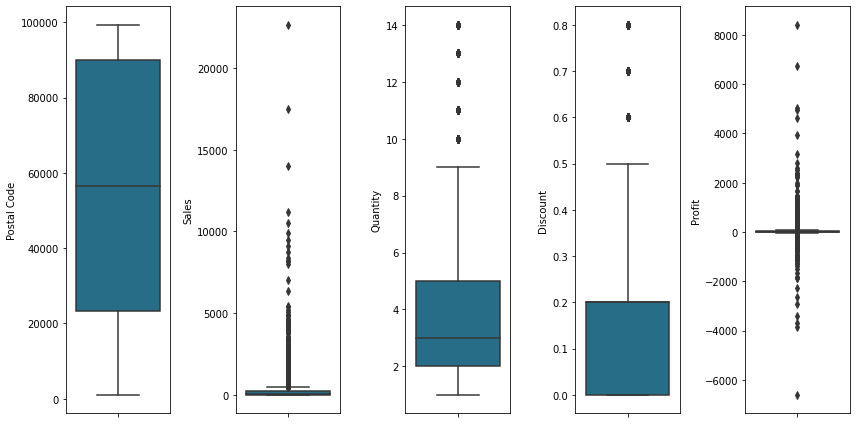

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = ['Postal Code','Sales','Quantity','Discount','Profit']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_store[features[i]], color='#187498')
    plt.tight_layout()

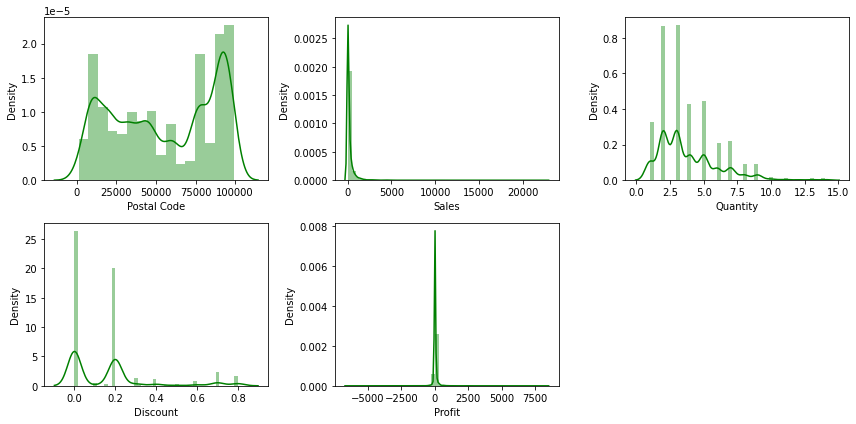

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = ['Postal Code','Sales','Quantity','Discount','Profit']
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df_store[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

As we figured outlier for these numerical features, it will be cleaned with IQR

In [ ]:
# IQR Calculation and its boundary

for target_col in df_store[features].columns:
  Q1 = df_store[target_col].quantile(0.25)
  Q3 = df_store[target_col].quantile(0.75)
  IQR = Q3 - Q1
  lower_boundary = Q1 - (1.5 * IQR)
  upper_boundary = Q3 + (1.5 * IQR)
  df_store[target_col]= np.where(df_store[target_col] > upper_boundary, upper_boundary,
                    np.where(df_store[target_col] < lower_boundary, lower_boundary,
                    df_store[target_col]))

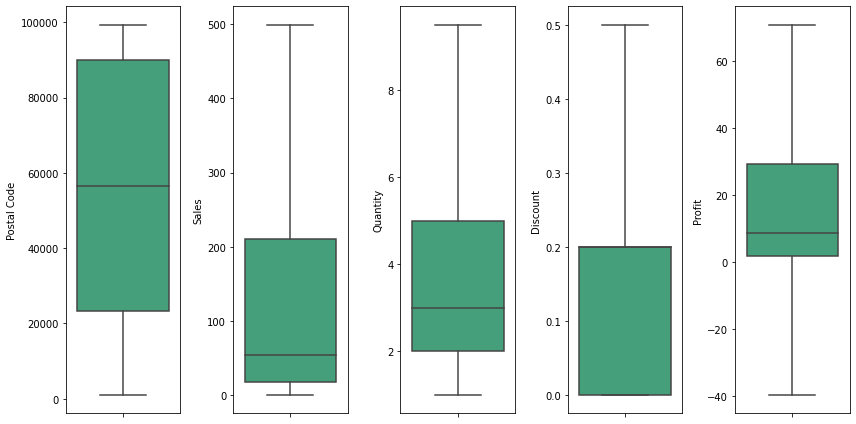

In [ ]:
plt.figure(figsize=(12,6))

for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_store[features[i]], color='#36AE7C')
    plt.tight_layout()

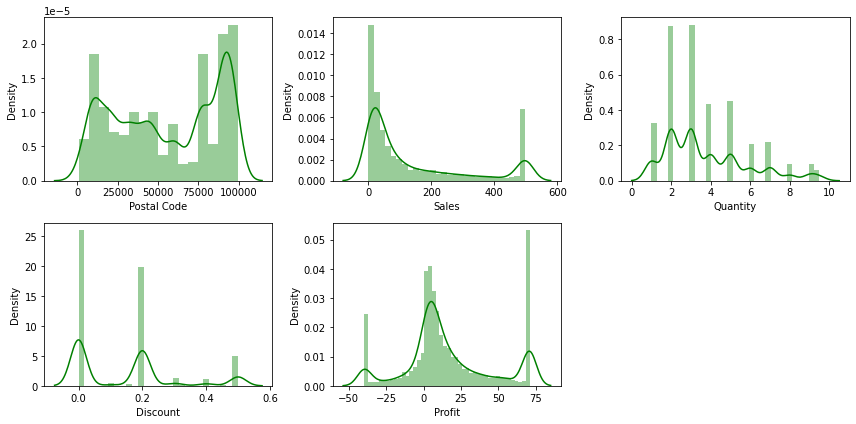

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df_store[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

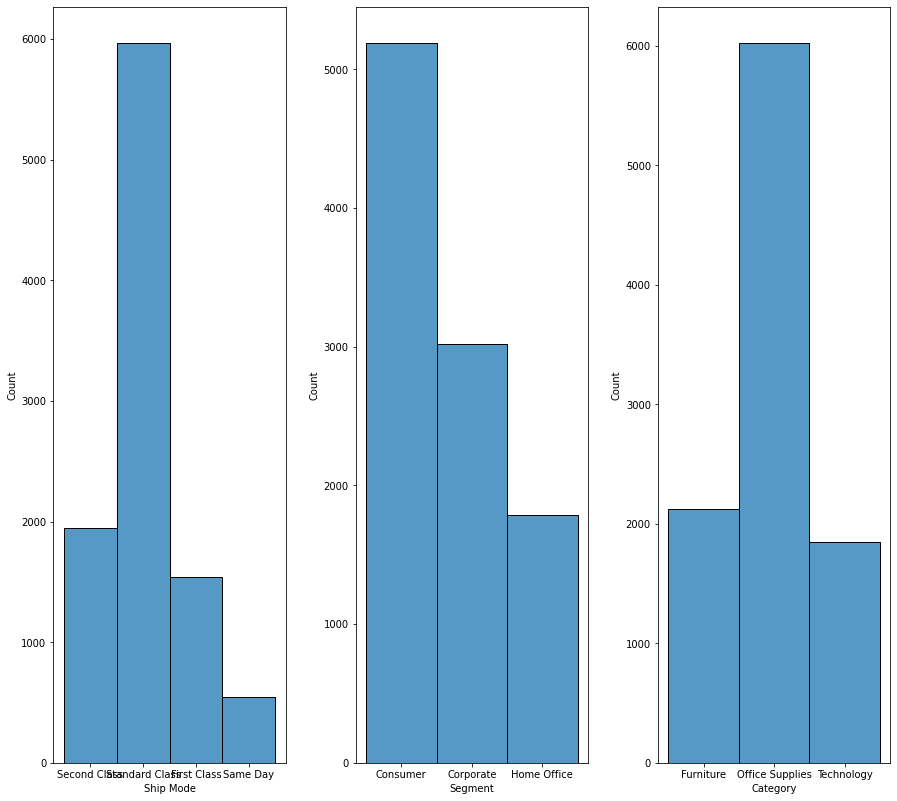

In [ ]:
# univariate for all categorical features
ctg_order = ['Ship Mode','Segment','Category']
fig, ax = plt.subplots(1, 3, figsize=(15, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.3, hspace=0.4)
for variable, subplot in zip(df_store[ctg_order].columns, ax.flatten()):
  sns.histplot(df_store[variable], ax=subplot)

'Ship Mode' = Mostly used with standard class

'Segment' = Biggest segment is coming from cunsomer or individual person

'Category' = Biggest selling is coming from 'Office Supplies'

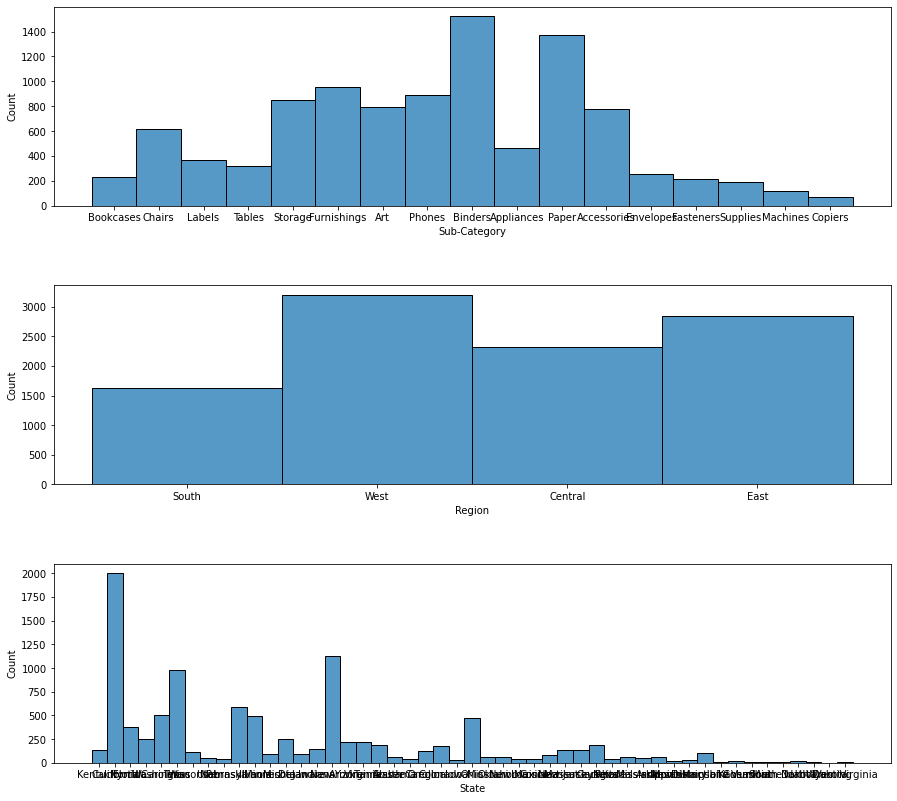

In [ ]:
# univariate for all categorical features
ctg_prodloc = ['Sub-Category','Region','State']
fig, ax = plt.subplots(3, 1, figsize=(15, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.3, hspace=0.4)
for variable, subplot in zip(df_store[ctg_prodloc].columns, ax.flatten()):
  sns.histplot(df_store[variable], ax=subplot)

'Sub Category' = Binder, paper and accessories categories is the highest buying sub-category

'Region' = Based from 4 region, West is the highest region

'State' = 

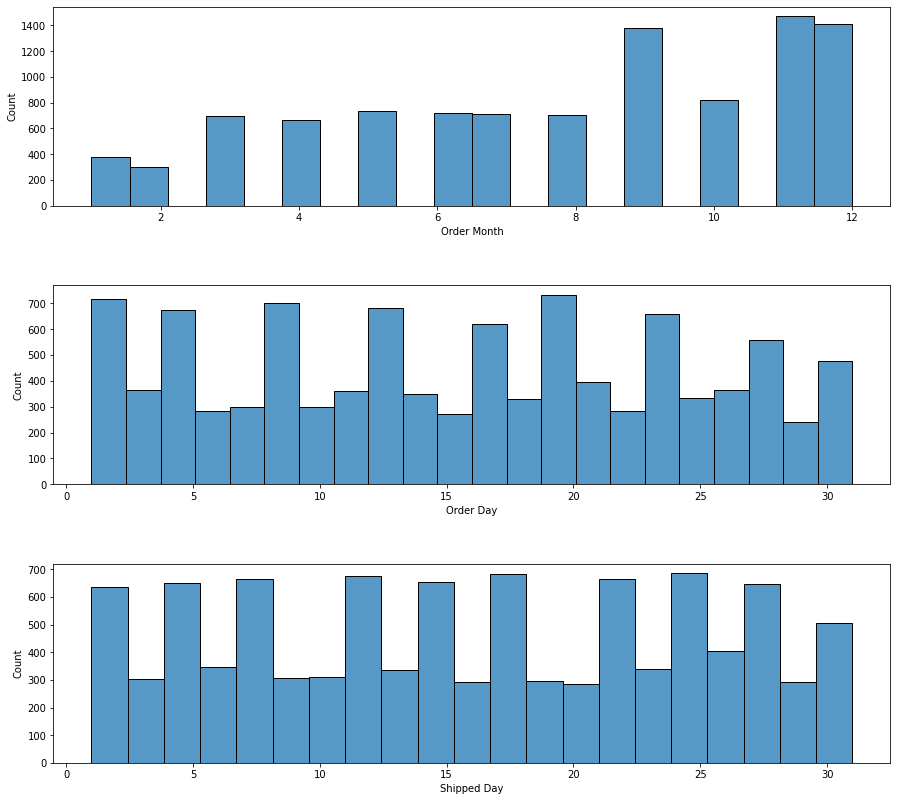

In [ ]:
df_store['Order Month'] = df_store['Order Date'].dt.month
df_store['Order Day'] = df_store['Order Date'].dt.day
df_store['Shipped Day'] = df_store['Ship Date'].dt.day

duration_order = ['Order Month','Order Day','Shipped Day']
fig, ax = plt.subplots(3, 1, figsize=(15, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.3, hspace=0.4)
for variable, subplot in zip(df_store[duration_order].columns, ax.flatten()):
  sns.histplot(df_store[variable], ax=subplot)

'Order Month' = most activity selling in the end of the year 

'Order Day' = during a month most activity selling in the beginning of the week so did 'Shipped Day'

### Bivariate Analysis with Deep Dive Questions

#### How is overall sales trend?

In [ ]:
# Getting month year from order_date
df_store['Month Year'] = df_store['Order Date'].apply(lambda x: x.strftime('%Y-%m'))
# grouping month_year by sales
df_temp = df_store.groupby('Month Year').sum()['Sales'].reset_index()

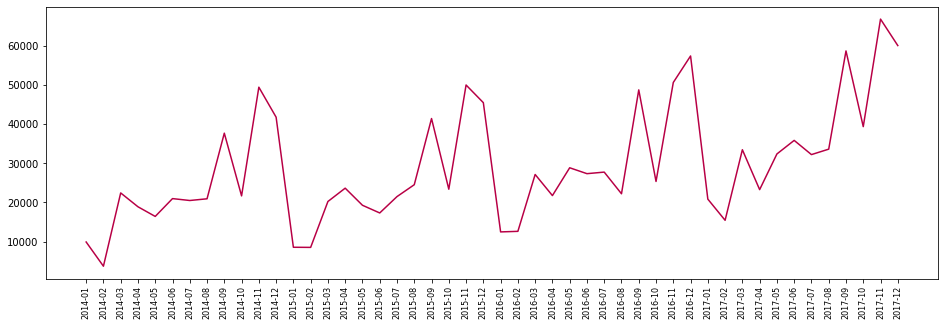

In [ ]:
# Setting the figure size
plt.figure(figsize=(16, 5))
plt.plot(df_temp['Month Year'], df_temp['Sales'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

We can easily figured that every end of the year (October-December), the sales are increased due to Thanksgiving and Chrismas sale

#### What is the highest sold goods based from Category

In [ ]:
sales_goods=df_store['Sales'].groupby(df_store['Category']).sum().sort_values()
sales_goods

Category
Technology         427987.3530
Furniture          480878.0084
Office Supplies    493104.0040
Name: Sales, dtype: float64

Text(0, 0.5, 'Total Sales')

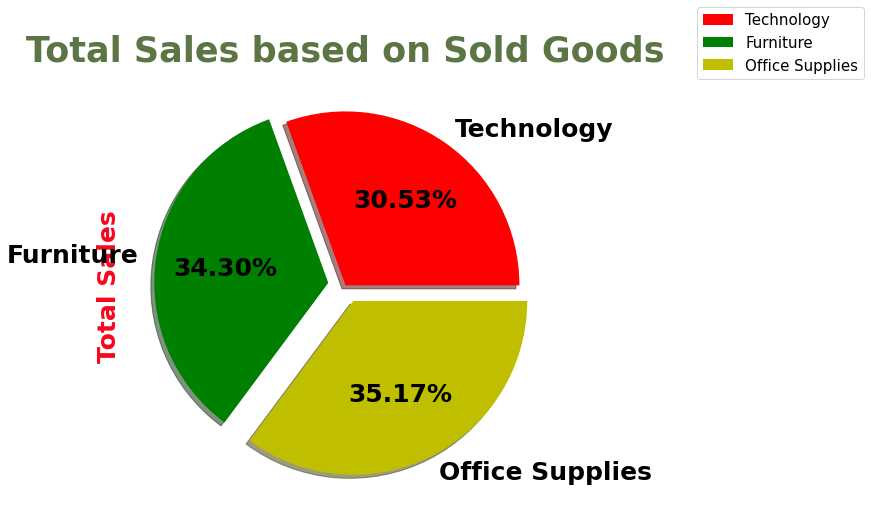

In [ ]:
plt.figure(figsize=(15,8))
sales_goods.plot.pie(textprops ={"fontsize":25,'fontweight':'bold','color':'black'},autopct = "%0.2f%%",explode = [0.0,0.1,0.1],colors=['r','g','y'],shadow=True)
plt.figlegend(fontsize=15)
plt.title('Total Sales based on Sold Goods',color='#5b7544',fontsize=35,fontweight='bold')
plt.ylabel('Total Sales',color='#f7071f',fontsize=25,fontweight='bold')

#### How is sales based from Sub Category and Region?

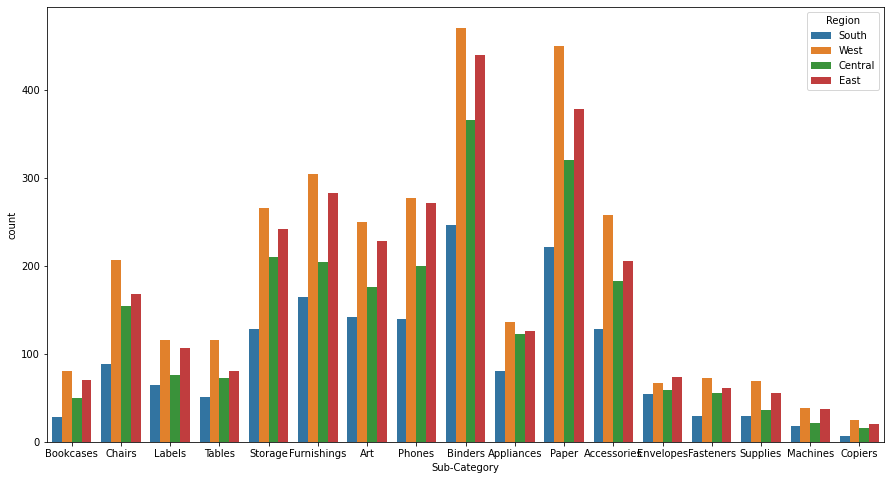

In [ ]:
#Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df_store)
plt.show()

#### What is Top 10 Sales by State and Category?

In [ ]:
# Grouping State by Sales

Ctg_sales = df_store.groupby(['State','Category']).agg(
    sales_sum = ('Sales', 'sum'),
    profit_sum = ('Profit', 'sum')
)

# Sorting the dataframe in descending order
Ctg_sales.sort_values(by=['sales_sum'], inplace=True, ascending=False)

# Highest Sales by State
top_sales = Ctg_sales[:10]
top_sales

sales_sum    profit_sum
State      Category                                  
California Furniture        104481.7655   7663.154900
           Office Supplies   99634.7420  23983.927600
           Technology        90104.5700  13153.517650
New York   Office Supplies   61415.5160  13815.236100
           Furniture         55920.9130   4788.592950
           Technology        51878.1980   9042.539250
Texas      Furniture         43528.9264  -4637.994075
           Technology        39135.7580   3682.872175
           Office Supplies   33911.9500   -792.778325
Washington Office Supplies   26643.3020   5610.890775

Text(0, 0.5, 'Total Sales')

<Figure size 1440x576 with 0 Axes>

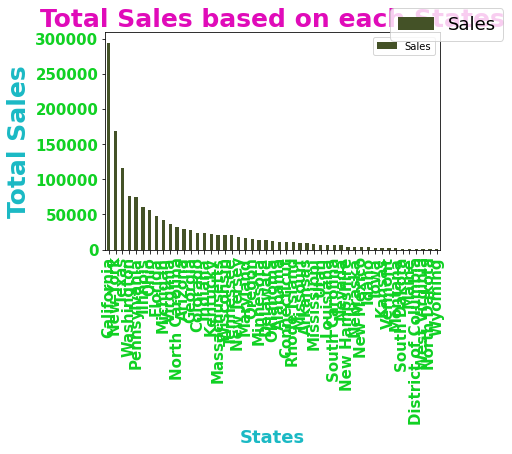

In [ ]:
# Grouping State by Sales
state_sales = pd.DataFrame(df_store.groupby('State').sum()['Sales'])

# Sorting the dataframe in descending order
state_sales.sort_values(by=['Sales'], inplace=True, ascending=False)


plt.figure(figsize=(20,8))
state_sales.plot(kind='bar',color='#445227')
plt.figlegend(fontsize=18)
plt.xticks(fontsize=15,fontweight='bold',color='#11d124')
plt.yticks(fontsize=15,fontweight='bold',color='#11d124')
plt.title('Total Sales based on each States',color='#e00bb9',fontsize=25,fontweight='bold')
plt.xlabel('States',color='#1bb9c4',fontsize=18,fontweight='bold')
plt.ylabel('Total Sales',color='#1bb9c4',fontsize=25,fontweight='bold')

#### How Sales based from ship mode?

In [ ]:
shipmode = df_store['Sales'].groupby(df_store['Ship Mode']).sum().sort_values()
shipmode

Ship Mode
Same Day           76925.2150
First Class       213530.8425
Second Class      279299.8792
Standard Class    832213.4287
Name: Sales, dtype: float64

Text(0, 0.5, 'Total Sales')

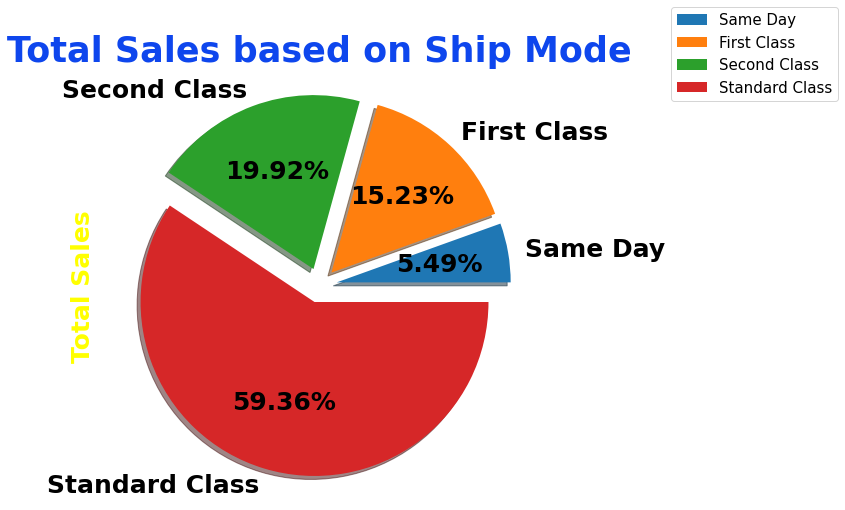

In [ ]:
plt.figure(figsize=(15,8))
shipmode.plot.pie(textprops ={"fontsize":25,'fontweight':'bold','color':'black'},autopct = "%0.2f%%",explode = [0.1,0.1,0.1,0.1],shadow=True)
plt.figlegend(fontsize=15)
plt.title('Total Sales based on Ship Mode',color='#0e46ed',fontsize=35,fontweight='bold')
plt.ylabel('Total Sales',color='yellow',fontsize=25,fontweight='bold')

## Data Preprocessing

### Converting categorical features to numeric

In [ ]:
# Add internal process coloumn and drop order & ship date as they have same values
df_store1 = df_store.copy()
df_store1['Interval Process'] = df_store['Shipped Day'] - df_store['Order Day']
df_store1.drop(['Month Year','Order Date','Ship Date'], axis=1, inplace=True)
df_store1.head()

,Ship Mode,Customer Name,Segment,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Day,Shipped Day,Interval Process
0,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2.0,0.00,41.913600,11,8,11,3
1,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",498.930,3.0,0.00,70.816875,11,8,11,3
2,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2.0,0.00,6.871400,6,12,16,4
3,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,498.930,5.0,0.45,-39.724125,10,11,18,7
4,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2.0,0.20,2.516400,10,11,18,7


In [ ]:
# Drop customer and product name, Postal code as already represents by other column
df_store1.drop(['Customer Name','Product Name','Postal Code'], axis=1, inplace=True)

In [ ]:
# Encdoing categorical features into numerics

df_store1['Ship Mode'].replace(['Same Day','First Class','Second Class','Standard Class'],[0,1,2,3],inplace=True)
df_store1['Segment'].replace(['Consumer','Corporate','Home Office'],[0,1,2],inplace=True)
df_store1['Region'].replace(['Central', 'East', 'South', 'West'],[0,1,2,3],inplace=True)
df_store1['Category'].replace(['Furniture','Office Supplies','Technology'],[0,1,2],inplace=True)

In [ ]:
df_store2 = df_store1.copy()

# Use frequency for encoding coloumn 'City'
freq_Cty = df_store2['City'].value_counts().reset_index()
freq_Cty.rename(columns={'index': 'City', 'City': 'City_freq'}, inplace = True)
df_store2 = df_store2.merge(freq_Cty[['City','City_freq']], on='City', how='inner')


# Use frequency for encoding coloumn 'State'
freq_St = df_store2['State'].value_counts().reset_index()
freq_St.rename(columns={'index': 'State', 'State': 'State_freq'}, inplace = True)
df_store2 = df_store2.merge(freq_St[['State','State_freq']], on='State', how='inner')

# Use frequency for encoding coloumn 'Sub-Category'
freq_subctg = df_store2['Sub-Category'].value_counts().reset_index()
freq_subctg.rename(columns={'index': 'Sub-Category', 'Sub-Category': 'Subcategory_freq'}, inplace = True)
df_store2 = df_store2.merge(freq_subctg[['Sub-Category','Subcategory_freq']], on='Sub-Category', how='inner')

df_store2.sample(5)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Month,Order Day,Shipped Day,Interval Process,City_freq,State_freq,Subcategory_freq
9969,1,0,Newark,Ohio,1,2,Machines,498.930,2.0,0.5,-39.724125,12,15,18,3,95,469,115
6872,1,0,Chicago,Illinois,0,1,Paper,30.528,8.0,0.2,9.540000,5,17,20,3,314,492,1370
1704,1,0,San Diego,California,3,1,Storage,443.920,4.0,0.0,8.878400,9,18,21,3,170,2001,846
2180,3,0,Auburn,New York,1,1,Storage,105.980,2.0,0.0,4.239200,9,12,18,6,24,1128,846
9888,3,0,Los Angeles,California,3,2,Machines,498.930,6.0,0.2,70.816875,12,30,3,-27,747,2001,115


In [ ]:
df_store3 = df_store2.copy()
# Drop City, State, and Sub-Category
df_store3.drop(['City','State','Sub-Category'], axis=1, inplace=True)
df_store3

,Ship Mode,Segment,Region,Category,Sales,Quantity,Discount,Profit,Order Month,Order Day,Shipped Day,Interval Process,City_freq,State_freq,Subcategory_freq
0,2,0,2,0,261.960,2.0,0.00,41.913600,11,8,11,3,51,139,228
1,3,0,3,0,141.960,2.0,0.00,41.168400,11,21,25,4,13,39,228
2,1,2,3,0,498.930,5.0,0.15,-30.245000,6,10,13,3,747,2001,228
3,3,1,3,0,290.666,2.0,0.15,27.356800,5,26,30,4,747,2001,228
4,3,0,3,0,120.666,2.0,0.15,18.454800,10,3,8,5,747,2001,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,3,0,2,2,479.970,3.0,0.00,70.816875,12,24,28,4,31,42,115
9990,3,0,1,2,480.000,4.0,0.00,70.816875,9,17,23,6,7,130,115
9991,3,1,1,2,498.930,7.0,0.00,70.816875,4,16,20,4,49,130,115
9992,3,1,1,2,319.920,8.0,0.00,70.816875,11,25,30,5,13,130,115


After converting and drop unrelated features we check again dataset

In [ ]:
df_store3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ship Mode         9994 non-null   int64  
 1   Segment           9994 non-null   int64  
 2   Region            9994 non-null   int64  
 3   Category          9994 non-null   int64  
 4   Sales             9994 non-null   float64
 5   Quantity          9994 non-null   float64
 6   Discount          9994 non-null   float64
 7   Profit            9994 non-null   float64
 8   Order Month       9994 non-null   int64  
 9   Order Day         9994 non-null   int64  
 10  Shipped Day       9994 non-null   int64  
 11  Interval Process  9994 non-null   int64  
 12  City_freq         9994 non-null   int64  
 13  State_freq        9994 non-null   int64  
 14  Subcategory_freq  9994 non-null   int64  
dtypes: float64(4), int64(11)
memory usage: 1.2 MB


<AxesSubplot:>

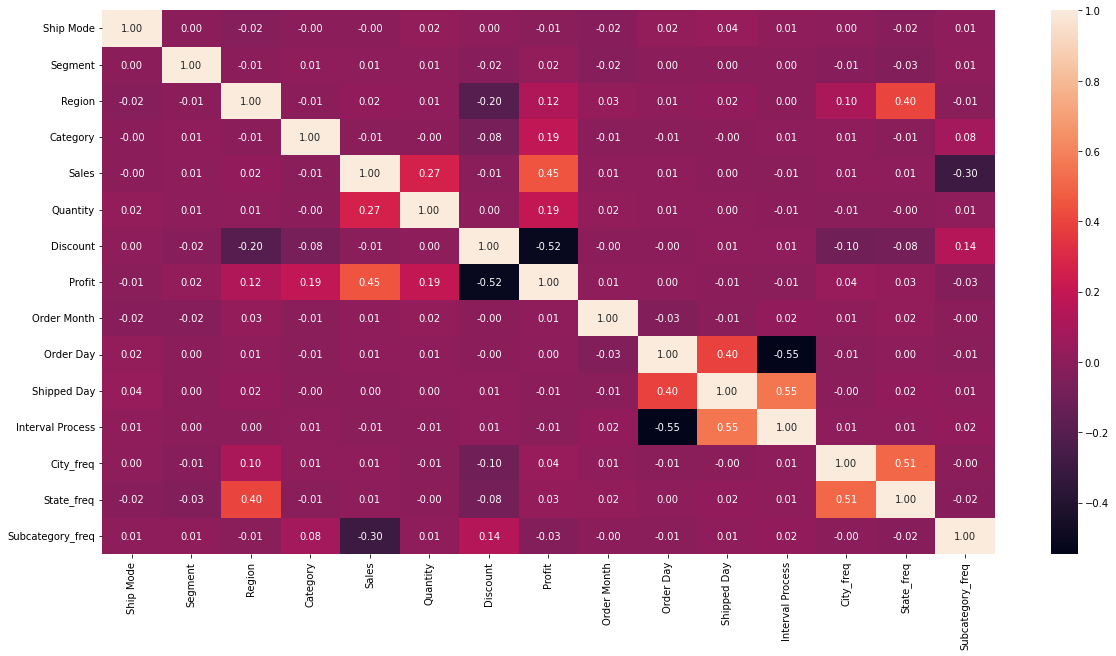

In [ ]:
plt.figure(figsize=(20,10))
correlation = df_store3.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')